In [1]:
using Gmsh: gmsh
using Gridap
using GridapGmsh
using Gridap.TensorValues
using Plots
using LinearAlgebra

In [2]:
I2 = SymTensorValue{2,Float64}(1.0 ,0.0 ,1.0)
I4 = I2⊗I2
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/2)*I4
I4_dev = I4_sym  - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.5, 0.0, -0.5, 0.0, 0.5, 0.0, -0.5, 0.0, 0.5)

In [3]:
using  Gmsh: gmsh
const  L = 8.0
const  LL = 0.475.*L
const  LR = 0.525.*L
const  H = 2.0
const  CH = 0.4 #Crack  height
const  CW = 0.2 #Crack  Width
const  lsp = 0.03
const  hfc = lsp/100 #Mesh  size  parameter
const  hf = lsp/2.1 #Mesh  size  parameter
const  h = 30*hf #Mesh  size  parameter
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.geo.addPoint((L/2)+(CW/2), 0.0 , 0.0, hf ,1)
gmsh.model.geo.addPoint(L, 0.0, 0.0, h, 2)
gmsh.model.geo.addPoint(L, H, 0.0, h, 3)
gmsh.model.geo.addPoint(LR , H, 0.0, hf, 4)
gmsh.model.geo.addPoint(LL , H, 0.0, hf, 5)
gmsh.model.geo.addPoint(0.0, H, 0.0, h, 6)
gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h, 7)
gmsh.model.geo.addPoint((L/2) -(CW/2), 0.0 , 0.0, hf ,8)
gmsh.model.geo.addPoint((L/2), CH , 0.0, hfc , 9)
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 5, 4)
gmsh.model.geo.addLine(5, 6, 5)
gmsh.model.geo.addLine(6, 7, 6)
gmsh.model.geo.addLine(7, 8, 7)
gmsh.model.geo.addLine(8, 9, 8)
gmsh.model.geo.addLine(9, 1, 9)

gmsh.model.geo.addCurveLoop([1,2,3,4,5,6,7,8,9],1)
gmsh.model.geo.addPlaneSurface([1], 1)
gmsh.model.addPhysicalGroup(2, [1],1)
gmsh.model.addPhysicalGroup(1, [4],1)
gmsh.model.addPhysicalGroup(1, [8,9],11)
gmsh.model.addPhysicalGroup(0, [7],2)
gmsh.model.addPhysicalGroup(0, [2],3)
gmsh.model.setPhysicalName(2, 1, "Domain")
gmsh.model.setPhysicalName(1, 1, "LoadLine")
gmsh.model.setPhysicalName(1, 11, "EnergyLine")
gmsh.model.setPhysicalName(0, 2, "LeftSupport")
gmsh.model.setPhysicalName(0, 3, "RightSupport")
gmsh.model.mesh.field.add("Box", 10)
gmsh.model.mesh.field.setNumber(10, "VIn", hf)
gmsh.model.mesh.field.setNumber(10, "VOut", h)
gmsh.model.mesh.field.setNumber(10, "XMin", (L/2)-CW)
gmsh.model.mesh.field.setNumber(10, "XMax", (L/2)+CW)
gmsh.model.mesh.field.setNumber(10, "YMin", 0)
gmsh.model.mesh.field.setNumber(10, "YMax", H)
gmsh.model.mesh.field.setAsBackgroundMesh(10)
gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("BeamWithNotchSymThreePtBending.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 60%] Meshing curve 6 (Line)
Info    : [ 70%] Meshing curve 7 (Line)
Info    : [ 80%] Meshing curve 8 (Line)
Info    : [ 90%] Meshing curve 9 (Line)
Info    : Done meshing 1D (Wall 0.0219543s, CPU 0.021956s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.224052s, CPU 0.224036s)
Info    : 7693 nodes 15393 elements
Info    : Writing 'BeamWithNotchSymThreePtBending.msh'...
Info    : Done writing 'BeamWithNotchSymThreePtBending.msh'


In [4]:
model = GmshDiscreteModel("BeamWithNotchSymThreePtBending.msh")
writevtk(model,"BeamWithNotchSymThreePtBending")

Info    : Reading 'BeamWithNotchSymThreePtBending.msh'...
Info    : 19 entities
Info    : 7693 nodes
Info    : 15242 elements
Info    : Done reading 'BeamWithNotchSymThreePtBending.msh'


3-element Vector{Vector{String}}:
 ["BeamWithNotchSymThreePtBending_0.vtu"]
 ["BeamWithNotchSymThreePtBending_1.vtu"]
 ["BeamWithNotchSymThreePtBending_2.vtu"]

In [5]:
using Gridap.Geometry
labels = get_face_labeling(model)
dimension = 2
mat_tags = get_face_tag(labels,dimension)

14984-element Vector{Int8}:
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 ⋮
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5
 5

In [6]:
const E = 20.8
const ν = 0.3
const Gc = 5e-4
G = E/(2*(1+ν))
l = 0.5
N = 0.5
const η = 1e-15

1.0e-15

In [7]:
ψ_crit = 10.0

10.0

In [8]:
μ = 5.33333333333333
κ = 5.33333333333333
λ = 11.999999999999993
γ = 7.999999999999996

7.999999999999996

In [9]:
function Eigen(ε)
    εArray = get_array(ε)
    Λ, P = eigen(εArray)
    ε1 = Λ[1]
    ε2 = Λ[2]
    if ε1 >= 0 &&  ε2 >= 0
        Λpos = [ε1 0; 0 ε2]
        Λneg = [0 0; 0 0]
    elseif ε1 >= 0 &&  ε2 < 0
        Λpos = [ε1 0; 0 0]
        Λneg = [0 0; 0 ε2]
    elseif ε1 < 0 &&  ε2 >= 0
        Λpos = [0 0; 0 ε2]
        Λneg = [ε1 0; 0 0]
    elseif ε1 < 0 &&  ε2 < 0
        Λpos = [0 0; 0 0]
        Λneg = [ε1 0; 0 ε2]
    end 
    εPos = TensorValue(P*Λpos*P')
    εNeg = TensorValue(P*Λneg*P')
    return εPos, εNeg
end

Eigen (generic function with 1 method)

In [10]:
function σ_Bmod(ε_sym, s_in)
    σM = (s_in^2 + η)*(λ*tr(ε_sym)*I2 + (2*μ + κ)*(ε_sym))
    return σM
end

σ_Bmod (generic function with 1 method)

In [11]:
E_Matrx = TensorValue(0,1,-1,0)

TensorValue{2, 2, Int64, 4}(0, 1, -1, 0)

In [12]:
function ε_Skw(∇,θ)
    ∇ᵀ = transpose(∇)
    w = (0.5*(∇ᵀ - ∇)) - (E_Matrx*θ)
    return w
end

ε_Skw (generic function with 1 method)

In [13]:
function σ_Cmod(ϵ_skew, s_in)
    σM = (s_in^2 + η)*(κ*ϵ_skew)
    return σM
end

σ_Cmod (generic function with 1 method)

In [14]:
function M_mod(∇, s_in)
    M = (s_in^2 + η)*(γ*∇)
    return M
end

M_mod (generic function with 1 method)

In [15]:
function ψPos(ε_in,∇_uh,θ, ∇_th)
    ∇_uhᵀ = transpose(∇_uh)
    ϵ_skew = 0.5*(∇_uhᵀ - ∇_uh) - E_Matrx*θ
    εPos, εNeg = Eigen(ε_in)
    
    if tr(ε_in) >= 0
        ψPos = 0.5*(λ*(tr(ε_in))^2 + (2*μ+κ)*(εPos ⊙ εPos)) + 0.5*(κ*(ϵ_skew ⊙ ϵ_skew)) + 0.5*γ*(∇_th ⋅ ∇_th)
    else
        ψPos = 0.5*((2*μ+κ)*(εPos ⊙ εPos)) + 0.5*(κ*(ϵ_skew ⊙ ϵ_skew)) + 0.5*γ*(∇_th ⋅ ∇_th)
    end
    
    return ψPos 
end
function ψMech(ε_in,∇_uh,θ, ∇_th)
    ∇_uhᵀ = transpose(∇_uh)
    ϵ_skew = 0.5*(∇_uhᵀ - ∇_uh) - E_Matrx*θ
    εPos, εNeg = Eigen(ε_in)
    if tr(ε_in) >= 0
        ψPos = 0.5*(λ*(tr(ε_in))^2 + (2*μ+κ)*(εPos ⊙ εPos))
    else
        ψPos = 0.5*((2*μ+κ)*(εPos ⊙ εPos))
    end
    return ψPos 
end

function ψCoup(ε_in,∇_uh,θ, ∇_th)
    ∇_uhᵀ = transpose(∇_uh)
    ϵ_skew = 0.5*(∇_uhᵀ - ∇_uh) - E_Matrx*θ
    ψPos = 0.5*(κ*(ϵ_skew ⊙ ϵ_skew))
    return ψPos 
end

function ψRot(ε_in,∇_uh,θ, ∇_th)
        ψPos = 0.5*γ*(∇_th ⋅ ∇_th)
    return ψPos 
end

ψRot (generic function with 1 method)

In [16]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
    ψPlus_in = ψhPos_in
    if ψPlus_in >= ψPlusPrev_in
        ψPlus_out = ψPlus_in
    else
        ψPlus_out = ψPlusPrev_in
    end
    true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [17]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = solve(op)
  qh
end

project (generic function with 1 method)

In [18]:
order = 1
degree = 2*order

2

In [19]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

GenericMeasure()

In [20]:
sId = CellState(1.0,dΩ)
shId = project(sId,model,dΩ,order)

SingleFieldFEFunction():
 num_cells: 14984
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 8453056611551485030

In [21]:
LoadTagId = get_tag_from_name(labels,"LoadLine")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 28
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 4467299854042700533

In [22]:
EnergyTagId = get_tag_from_name(labels,"EnergyLine")
E_Load = BoundaryTriangulation(model,tags = EnergyTagId)
dE_Load = Measure(E_Load,degree)

GenericMeasure()

In [23]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;conformity=:H1)
sh = zero(V0_PF)

SingleFieldFEFunction():
 num_cells: 14984
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 8453056611551485030

In [24]:
reffe_theta = ReferenceFE(lagrangian,Float64,order)
V0_theta  = TestFESpace(model,reffe_theta;
  conformity=:H1)
θh = zero(V0_theta)

SingleFieldFEFunction():
 num_cells: 14984
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 8453056611551485030

In [25]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["LeftSupport","RightSupport","LoadLine"],
          dirichlet_masks=[(false, true), (true, true), (false, true)])

uh = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 14984
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 8453056611551485030

In [26]:
V0 = MultiFieldFESpace([V0_Disp,V0_theta])

MultiFieldFESpace()

In [27]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
    U_PF = TrialFESpace(V0_PF)
        a_PF(s,ϕ) = ∫( (Gc*lsp*∇(ϕ)⋅ ∇(s)) + (2*ψPlusPrev_in*s*ϕ)  + ((Gc/lsp)*s*ϕ) )*dΩ
        b_PF(ϕ) = ∫( (Gc/lsp)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = solve(op_PF)
    return sh_out
end

stepPhaseField (generic function with 1 method)

In [28]:
function Skw(u,θ)
    ∇ᵀ = transpose(∇(u))
    w = (0.5*(∇ᵀ - ∇(u)) - (E_Matrx*θ))
    return w
end

Skw (generic function with 1 method)

In [29]:
function   stepDisp(uh_in,θ_in,sh_in,uApp)
        uApp1(x) = VectorValue(0.0,0.0)
        uApp2(x) = VectorValue(0.0,0.0)
        uApp3(x) = VectorValue(0.0,-uApp)
        U_Disp = TrialFESpace(V0_Disp,[uApp1,uApp2,uApp3])
        
        U_theta = TrialFESpace(V0_theta)
        U = MultiFieldFESpace([U_Disp,U_theta ])

        a((u,θ),(w,v))  = ∫( (ε(w) ⊙ (σ_Bmod∘(ε(u),sh_in)) ) + ((Skw(w,v)) ⊙ (σ_Cmod∘(ε_Skw∘(∇(u),θ), sh_in)) ) + ((∇(v))⋅ (M_mod∘(∇(θ),sh_in))) - (v*((E_Matrx) ⊙ (σ_Cmod∘(ε_Skw∘(∇(u),θ),sh_in))) ))*dΩ
        b((w,v))= 0
        op_Disp = AffineFEOperator(a,b,U,V0)
        uh_out = solve(op_Disp)
        uh_out,phih_out = uh_out
    return uh_out, phih_out
end

stepDisp (generic function with 1 method)

In [30]:
cd("Results_N0.5_l0.5")

In [31]:
uApp = 0
delu = 1e-3
uAppMax = 0.1
innerMax = 10
count = 0
Load = Float64[]
Displacement = Float64[]
Energy = Float64[]
Energy_Mech = Float64[]
Energy_Coup = Float64[]
Energy_Rot = Float64[]

sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ψPlusPrev = CellState(0.0,dΩ)
ψhPos = CellState(0.0,dΩ)
ψhPos_in = project(ψhPos,model,dΩ,order)

while uApp .< uAppMax 
        
    uApp = uApp .+ delu
    count = count .+ 1
    if uApp >= 3e-2
        delv = 1e-4
    end
   
    print("\n Entering displacemtent step$count :", float(uApp))
    
   for inner = 1:innerMax
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        err = abs(sum(∫( Gc*lsp*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh  + (Gc/lsp)*sh*sh)*dΩ - ∫( (Gc/lsp)*sh)*dΩ))/abs(sum(∫( (Gc/lsp)*sh)*dΩ))
        print("\n Relative error = ",float(err))
        
        sh = stepPhaseField(uh,ψhPlusPrev) 
        uh,θh = stepDisp(uh,θh,sh,uApp)
        
        ψhPos_in = ψPos∘(ε(uh),∇(uh),θh,∇(θh))      
        
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
        
        if err < 1e-8
            break 
        end
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_Bmod∘(ε(uh),sh)) ) *dΓ_Load + ∫( n_Γ_Load ⋅ (σ_Cmod∘(ε_Skw∘(∇(uh),θh),sh) ) )  *dΓ_Load)

    p = get_cell_points(dE_Load)
    A = evaluate(ψPos∘(ε(uh),∇(uh),θh, ∇(θh)),p)
    B = [A[i][j] for i in 1:size(A,1), j in 1:2]
    PosEn = maximum(B)
    
    A = evaluate(ψMech∘(ε(uh),∇(uh),θh, ∇(θh)),p)
    B = [A[i][j] for i in 1:size(A,1), j in 1:2]
    Psi_Mech = maximum(B)
    
    A = evaluate(ψCoup∘(ε(uh),∇(uh),θh, ∇(θh)),p)
    B = [A[i][j] for i in 1:size(A,1), j in 1:2]
    Psi_Coup = maximum(B)
    
    A = evaluate(ψRot∘(ε(uh),∇(uh),θh, ∇(θh)),p)
    B = [A[i][j] for i in 1:size(A,1), j in 1:2]
    Psi_Rot = maximum(B)
    
    push!(Energy, PosEn)
    push!(Energy_Mech, Psi_Mech)
    push!(Energy_Coup, Psi_Coup)
    push!(Energy_Rot, Psi_Rot)
    push!(Load, Node_Force[2])
    push!(Displacement, uApp)
    if mod(count,10) == 0
         writevtk(Ω,"results_PhaseFieldNotchedBeam_Spectral$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"θ" => θh, "epsi"=>ε(uh)])
    end
end


 Entering displacemtent step1 :0.001
 Relative error = 5.194886154290165e-17
 Entering displacemtent step2 :0.002
 Relative error = 5.071333000749492e-6
 Relative error = 1.5213815694528244e-5
 Relative error = 1.8604826585796714e-9
 Entering displacemtent step3 :0.003
 Relative error = 2.1973603172136144e-12
 Entering displacemtent step4 :0.004
 Relative error = 2.535385914359444e-5
 Relative error = 3.549673443841212e-5
 Relative error = 1.740965451018428e-8
 Relative error = 8.248061663582514e-11
 Entering displacemtent step5 :0.005
 Relative error = 5.289944215416021e-13
 Entering displacemtent step6 :0.006
 Relative error = 4.561907461511988e-5
 Relative error = 5.577481426886021e-5
 Relative error = 6.194229061583624e-8
 Relative error = 6.639829817905623e-10
 Entering displacemtent step7 :0.007
 Relative error = 9.628181902796385e-12
 Entering displacemtent step8 :0.008
 Relative error = 6.584893369016519e-5
 Relative error = 7.604552440333224e-5
 Relative error = 1.51669321979

In [32]:
writevtk(Ω,"results_PhaseFieldNotchedBeam_Spectral$count",cellfields=
        ["uh"=>uh,"s"=>sh ,"θ" => θh, "epsi"=>ε(uh)])

(["results_PhaseFieldNotchedBeam_Spectral100.vtu"],)

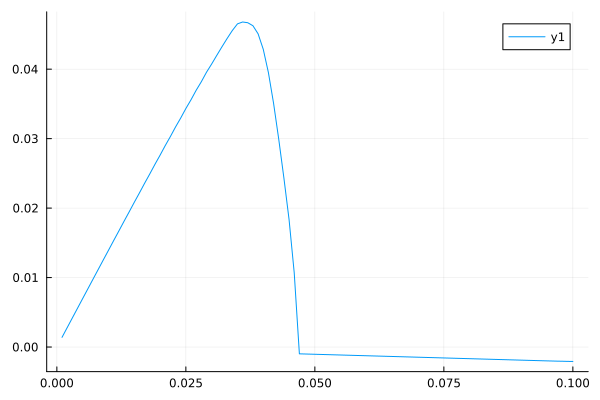

In [33]:
plot(Displacement,-Load)
#plot(Displacement,Energy)
#plot(Displacement,Energy_Mech)
#plot(Displacement,Energy_Coup)
#plot(Displacement,Energy_Rot)

In [34]:
cd("../DispLoadData_THreePointBending_Spectral")

In [35]:
using DelimitedFiles
Disp = writedlm( "DispDataNotchedBeam_SpectralN0.5_l0.5.csv",  Displacement, ',')
Force = writedlm("LoadDataNotchedBeam_SpectralN0.5_l0.5.csv",  Load, ',')
Energy = writedlm("EnergyDataNotchedBeam_Spectral_N0.5_l0.5.csv",  Energy, ',')
Energy_Mech = writedlm("EnergyMechDataNotchedBeam_Spectral_N0.5_l0.5.csv",  Energy_Mech, ',')
Energy_Coup = writedlm("EnergyCoupDataNotchedBeam_Spectral_N0.5_l0.5.csv",  Energy_Coup, ',')
Energy_Rot = writedlm("EnergyRotDataNotchedBeam_Spectral_N0.5_l0.5.csv",  Energy_Rot, ',')